# D208: Predictive Modeling - Performance Assessment - Task 2: Logistic Regression Modeling
***

### By: Leng Yang
### Student ID: 012298452
### Date: August 16, 2024
***
<br>
<br>
<br>

## Table of Contents
* [A1. Research Question](#A1)
* [A2. Goals](#A2)
* [B1. Summary of Assumptions](#B1)
* [B2. Tool Benefits](#B2)
* [B3. Appropriate Technique](#B3)
* [C1. Data Cleaning Goals](#C1)
* [C2. Summary Statistics](#C2)
* [C3. Visualizations](#C3)
* [C4. Data Transformation](#C4)
* [C5. Prepared Data Set](#C5)
* [D1. Initial Model](#D1)
* [D2. Justification of Model Reduction](#D2)
* [D3. Reduced Logistic Regression Model](#D3)
* [E1. Model Comparison](#E1)
* [E2. Output and Calculations](#E2)
* [E3. Code](#E3)
* [F1. Results](#F1)
* [F2. Recommendations](#F2)
* [G. Panopto Demonstration](#G)
* [H. Sources of Third-Party Code](#H)
* [I. Sources](#I)

<BR>

## A1. Research Question <a class="anchor" id="A1"></a>

The research question of focus is: which factors are associated with hospital readmissions?

<BR>

## A2. Goals <a class="anchor" id="A2"></a>

This analysis aims to determine which factors, from the data, are most associated with hospital readmissions. This analysis is relevant in that healthcare providers can gain a better insight into which major contributing factors lead to hospital readmissions. Additionally, this analysis would allow for predicting whether a patient could be re-admitted based on such outstanding factors. With these insights, healthcare providers could change care plans to prevent possible readmissions, benefitting the organization and the patients.

<BR>

## B1. Summary of Assumptions <a class="anchor" id="B1"></a>

A logistic regression model is used to perform this analysis. As models are built, it is essential to consider each's underlying assumptions and limitations. Below are four assumptions of the logistic regression model (Bobbitt, 2020):
* The response variable is binary. That is to say that the response variable only contains two possible outcomes.
* There is no multicollinearity such that none of the predictor variables are highly correlated with one another. Predictor variables that are highly correlated with one another could cause unreliable estimates of those predictors and would, thus, create an unreliable model.
* There are no extreme outliers or influential observations. These outliers may influence estimates of both the predictors and the model and cause the model to be unreliable.
* There is a linearity between each predictor variable and the response variable's logit (log odds). One way to check this assumption is by using a Box-Tidwell test.

<BR>

## B2. Tool Benefits <a class="anchor" id="B2"></a>

The analysis will be conducted using Python. Python will be used because it can handle large datasets particularly well without sacrificing many resources. Python's syntax allows better code readability and code debugging. Additionally, Python contains many data science packages that make the process of data wrangling and modeling easier to work with. Below are some of the packages that are used in the analysis.

* Pandas: used for data storage in a tabular format as well as for data manipulation
* Numpy: used for numerical calculations and statistics
* Statsmodels: used for modeling linear regression
* Matplotlib and Seaborn: both are used for generating data visualizations
* Scikit-Learn: used for data transformations and model evaluation metrics

In [16]:
#Set up initial environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

<BR>

## B3. Appropriate Technique <a class="anchor" id="B3"></a>

The model used in this analysis is a logistic regression model because the analysis focuses on a classification problem. This model is used because of the nature of the response variable to be studied, namely whether patients were readmitted or not after their release from the initial hospital stay. This response is binary, Yes/No, and is what logistic regression aims to measure. The model calculates a probability using a multitude of predictors and, from this probability, determines the most likely outcome. Bringing it all together, the model aims to classify, using predictors and inputs, whether patients were readmitted or not.

<BR>

## C1. Data Cleaning Goals <a class="anchor" id="C1"></a>

The data has to be cleaned first before modeling can begin to try to minimize errors. Before cleaning, the column names were re-orchestrated using a snake-case naming convention for clarity and easier handling. The first thing checked was whether the data set contained duplicates. As there were no duplicates, no records were dropped. Next was the check for missing values, of which none were found. Next was the check for outliers. Although outliers were found, none were removed as the values for each variable were within a logical and reasonable range.

Additionally, modifying values without first consorting to the data source would violate medical data privacy rules and subject the analysis to ethical issues. The `zip code` variable was found to be initially imported as a number, so it was changed to an object type and had the missing leading zeroes filled in. Lastly, the values of each variable were examined to ensure they were in line with that of the data dictionary.

In [23]:
#Read data file into dataframe
df = pd.read_csv('medical_clean.csv')

In [24]:
# Standardize column names using snake_case and re-express names for comprehensiveness (Yang, 2024).
col_names = ['case_order', 'customer_id', 'interaction', 'uid', 'city', 'state', 'county', 'zip', 'latitude', 'longitude',
             'population', 'area', 'timezone', 'job', 'children', 'age', 'income', 'marital', 'gender', 'readmission', 
             'vit_d_level', 'doc_visits', 'full_meals_eaten', 'vit_d_supp', 'soft_drink', 'initial_admin', 'high_blood', 'stroke', 'complication_risk', 'overweight',
             'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'services', 'initial_days', 
             'total_charge', 'additional_charges', 'item_1', 'item_2', 'item_3', 'item_4', 'item_5', 'item_6', 'item_7', 'item_8']
df.columns = col_names
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [25]:
#Look for missing values and initial data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case_order          10000 non-null  int64  
 1   customer_id         10000 non-null  object 
 2   interaction         10000 non-null  object 
 3   uid                 10000 non-null  object 
 4   city                10000 non-null  object 
 5   state               10000 non-null  object 
 6   county              10000 non-null  object 
 7   zip                 10000 non-null  int64  
 8   latitude            10000 non-null  float64
 9   longitude           10000 non-null  float64
 10  population          10000 non-null  int64  
 11  area                10000 non-null  object 
 12  timezone            10000 non-null  object 
 13  job                 10000 non-null  object 
 14  children            10000 non-null  int64  
 15  age                 10000 non-null  int64  
 16  incom

In [26]:
#Check for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

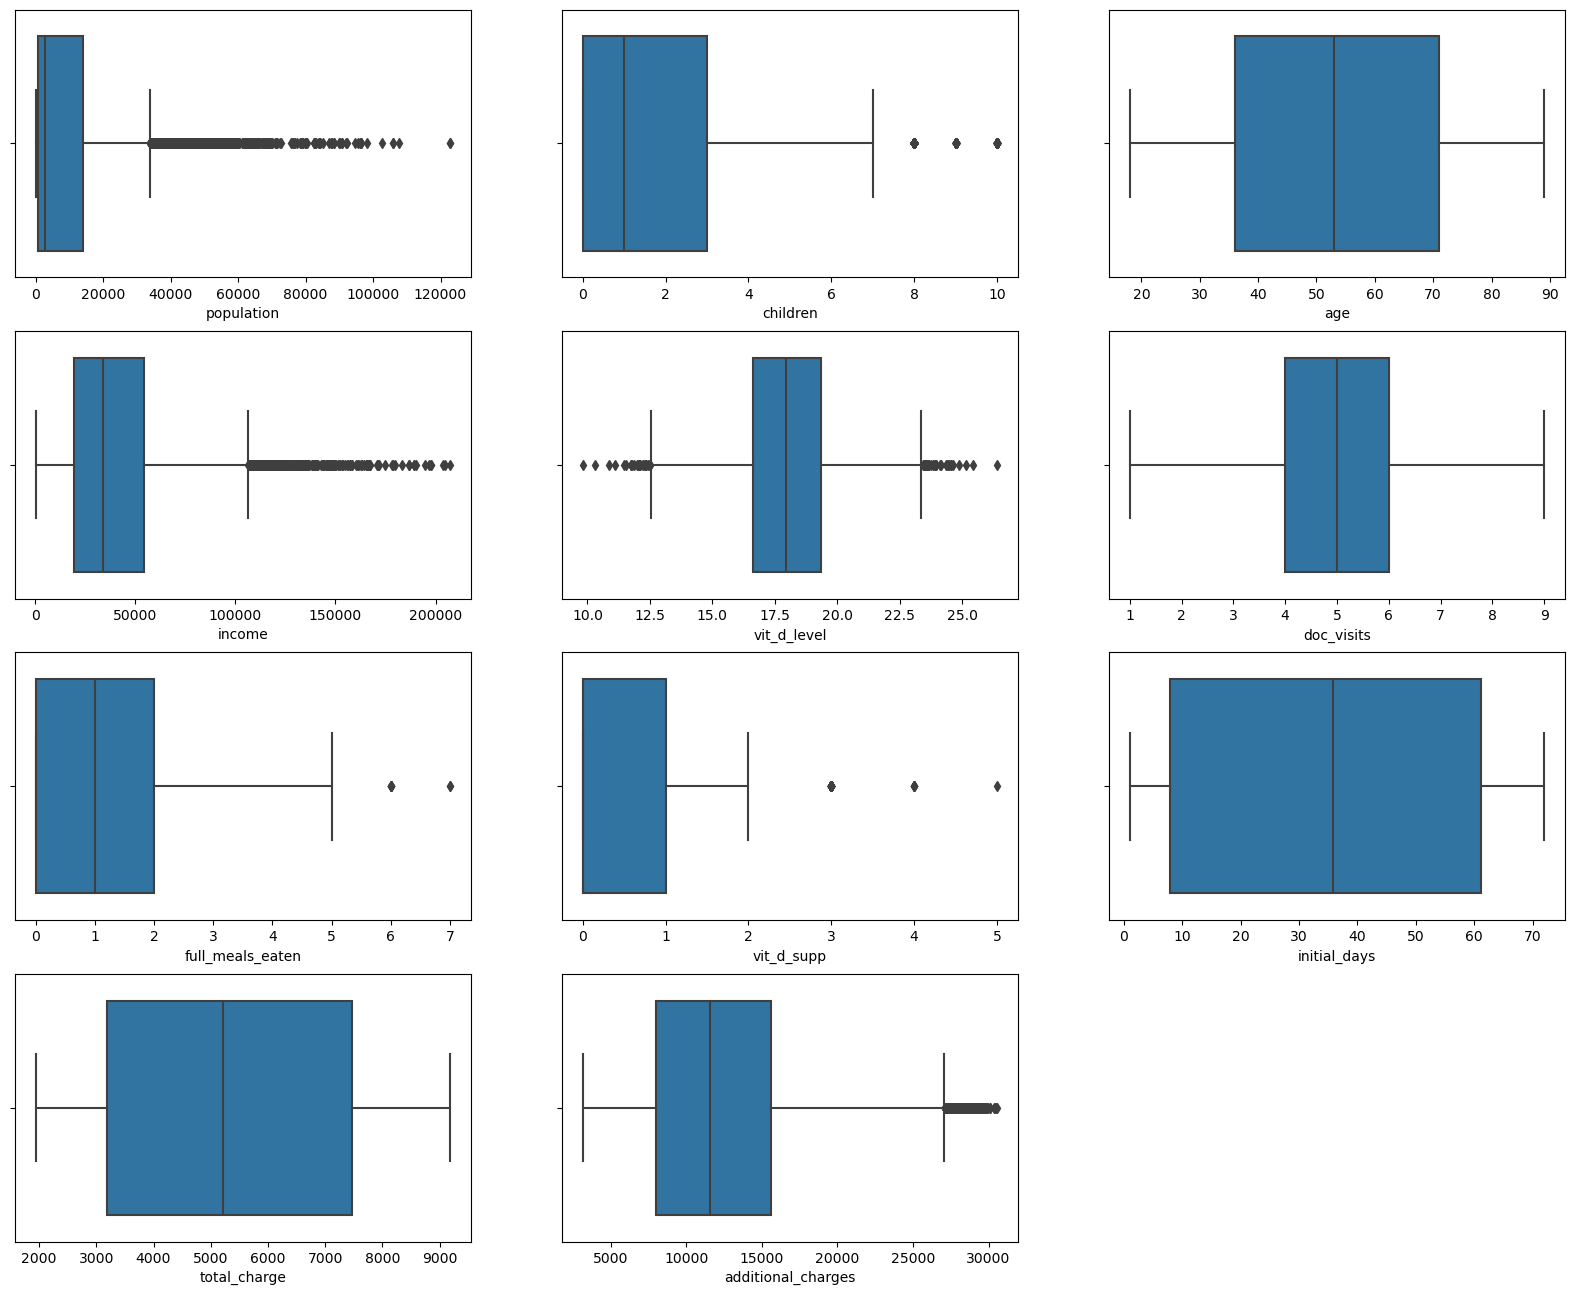

In [27]:
# Code borrowed from previous assignment (Yang, 2024).

#Check for outliers from continuous variables
fig, axes = plt.subplots(4, 3, figsize=(20,16))

sns.boxplot(data=df, x='population', ax=axes[0,0])
sns.boxplot(data=df, x='children', ax=axes[0,1])
sns.boxplot(data=df, x='age', ax=axes[0,2])
sns.boxplot(data=df, x='income', ax=axes[1,0])
sns.boxplot(data=df, x='vit_d_level', ax=axes[1,1])
sns.boxplot(data=df, x='doc_visits', ax=axes[1,2])
sns.boxplot(data=df, x='full_meals_eaten', ax=axes[2,0])
sns.boxplot(data=df, x='vit_d_supp', ax=axes[2,1])
sns.boxplot(data=df, x='initial_days', ax=axes[2,2])
sns.boxplot(data=df, x='total_charge', ax=axes[3,0])
sns.boxplot(data=df, x='additional_charges', ax=axes[3,1])
fig.delaxes(axes[3,2]);

In [28]:
#Express 'zip' variable as qualitative and re-fill missing leading zeroes
df.zip = df.zip.astype('str').str.zfill(5)

#Final check of data
df.head()

,case_order,customer_id,interaction,uid,city,state,county,zip,latitude,longitude,population,area,timezone,job,children,age,income,marital,gender,readmission,vit_d_level,doc_visits,full_meals_eaten,vit_d_supp,soft_drink,initial_admin,high_blood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_days,total_charge,additional_charges,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<BR>

## C2. Summary Statitistics <a class="anchor" id="C2"></a>

The predictors for the initial model will include only a subset of the overall data. The unique customer identifiers will not be used as they are used only to identify patients or interactions and do not contribute to the analysis in any way. Survey response ratings are excluded as they contain no relevant information regarding this analysis. Patient demographic information, except patient age and gender, is also excluded as it contains no valuable information for the analysis. The response variable is `readmission`. The interested predictors for this analysis are: `age`, `vit_d_levels`, `doc_visits`, `initial_days`, `gender`, `initial_admin`, `complication_risk`, `high_blood`, `stroke`, `overweight`, `arthritis`, `diabetes`, `hyperlipidemia`, `back_pain`, `anxiety`, `allergic_rhinitis`, `reflux_esophagitis`, and `asthma`.

* `readmission`: Most patients were not readmitted, which accounted for 63.31% of patients.

In [33]:
df.readmission.value_counts()

readmission
No     6331
Yes    3669
Name: count, dtype: int64

* `age`: There is a minimum age of 18 and a maximum age of 89, with a range of 71. This would indicate that there are no children within this data set. The mean age is 53.51 and the median age is 53.
* `vit_d_level`: There is a minimum level of 9.80 and a maximum level of 26.39, with a range of 16.59. The mean level is 17.96 and the median level is 17.95.
* `doc_visits`: There is a minimum doctor visit of 1 and a maximum visit of 9, with a range of 8 visits. The mean visits is 5.01 and the median number of visits is 5.
* `initial_days`: The variable has a minimum of 1.00 day and a maximum of 71.98 days, with a range of 70.98 days. There is also a mean of 34.46 days and a median of 35.84 days.

In [35]:
#Summary statistics for continuous variables
df[['age', 'vit_d_level', 'doc_visits', 'initial_days']].describe()

,age,vit_d_level,doc_visits,initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,34.455299
std,20.638538,2.017231,1.045734,26.309341
min,18.000000,9.806483,1.000000,1.001981
25%,36.000000,16.626439,4.000000,7.896215
50%,53.000000,17.951122,5.000000,35.836244
75%,71.000000,19.347963,6.000000,61.161020
max,89.000000,26.394449,9.000000,71.981490


* `gender`: A little over half of patients identified as female, at 50.18%. The next highest identified as male, at 47.68%. Lastly, only 2.14% of patients identified as nonbinary.

In [37]:
df.gender.value_counts()

gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

* `initial_admin`: The largest reason for a patient's initial admission was due to emergencies, making up 50.6% of the initial admissions. This is followed by elective admissions, at 25.04%, and then observation admissions, which were the least prevalent, at 24.36%.

In [39]:
df.initial_admin.value_counts()

initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

* `complication_risk`: The most assessed complication risk was at a medium level, making of 45.17% of patients. This is followed by high complication risk, at 33.58%, and then low complication risk, at 21.25%.

In [41]:
df.complication_risk.value_counts()

complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

* `high_blood`: Most patients did not have high blood pressure, which was at a level of 59.1%.

In [43]:
df.high_blood.value_counts()

high_blood
No     5910
Yes    4090
Name: count, dtype: int64

* `stroke`: Most patients did not have a condition of stroke, which was at a level of 80.07%.

In [45]:
df.stroke.value_counts()

stroke
No     8007
Yes    1993
Name: count, dtype: int64

* `overweight`: Most patients were not overweight, which accounted for 70.94% of the patients.

In [47]:
df.overweight.value_counts()

overweight
Yes    7094
No     2906
Name: count, dtype: int64

* `arthritis`: Most patients did not have arthritis, which was at a level of 64.26%.

In [49]:
df.arthritis.value_counts()

arthritis
No     6426
Yes    3574
Name: count, dtype: int64

* `diabetes`: Most patients did not have diabetes, which was at a level of 72.62%.

In [51]:
df.diabetes.value_counts()

diabetes
No     7262
Yes    2738
Name: count, dtype: int64

* `hyperlipidemia`: Most patients did not have hyperlipidemia, which was at a level of 66.28%.

In [53]:
df.hyperlipidemia.value_counts()

hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

* `back_pain`: Most patients did not have back pain, which was at a level of 58.86%.

In [55]:
df.back_pain.value_counts()

back_pain
No     5886
Yes    4114
Name: count, dtype: int64

* `anxiety`: Most patients did not have anxiety, which was 67.85% of the patients.

In [57]:
df.anxiety.value_counts()

anxiety
No     6785
Yes    3215
Name: count, dtype: int64

* `allergic_rhinitis`: Most patients did not have allergic rhinitis, which was 60.59% of the patients.

In [59]:
df.allergic_rhinitis.value_counts()

allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

* `reflux_esophagitis`: Most patients did not have reflux esophagitis, which was 58.65% of the patients.

In [61]:
df.reflux_esophagitis.value_counts()

reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

* `asthma`: Most patients did not have asthma, which was 71.07% of the patients.

In [63]:
df.asthma.value_counts()

asthma
No     7107
Yes    2893
Name: count, dtype: int64

<BR>

## C3. Visualizations <a class="anchor" id="C3"></a>

* `hospital_readmission`

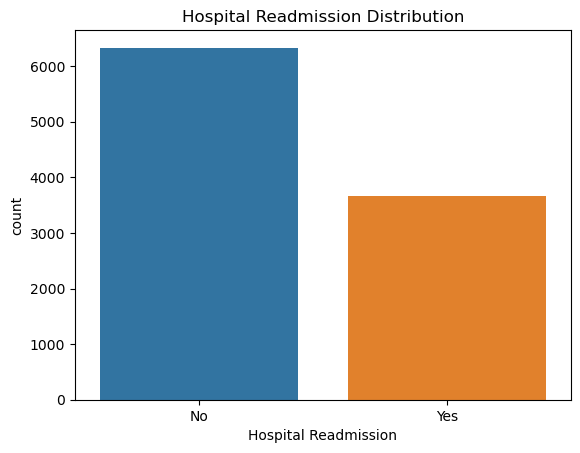

In [67]:
sns.countplot(x=df.readmission)
plt.title('Hospital Readmission Distribution')
plt.xlabel('Hospital Readmission');

* `age`

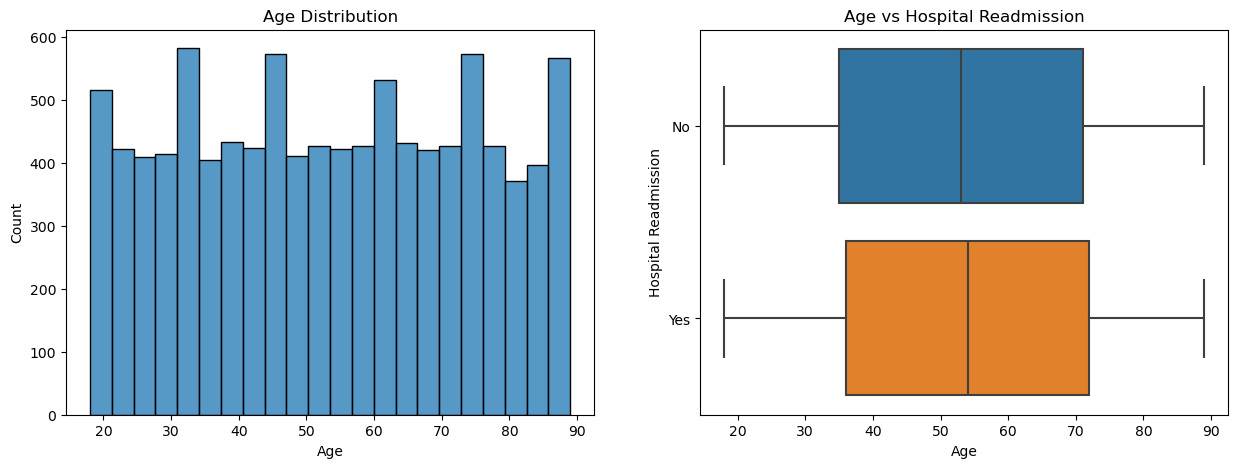

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#Univariate visualization
sns.histplot(data=df, x='age', ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

#Bivariate visualization
sns.boxplot(data=df, x='age', y='readmission', ax=ax[1])
ax[1].set_title('Age vs Hospital Readmission')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Hospital Readmission');

* `vit_d_level`: There is a minimum level of 9.80 and a maximum level of 26.39, with a range of 16.59. The mean level is 17.96 and the median level is 17.95.

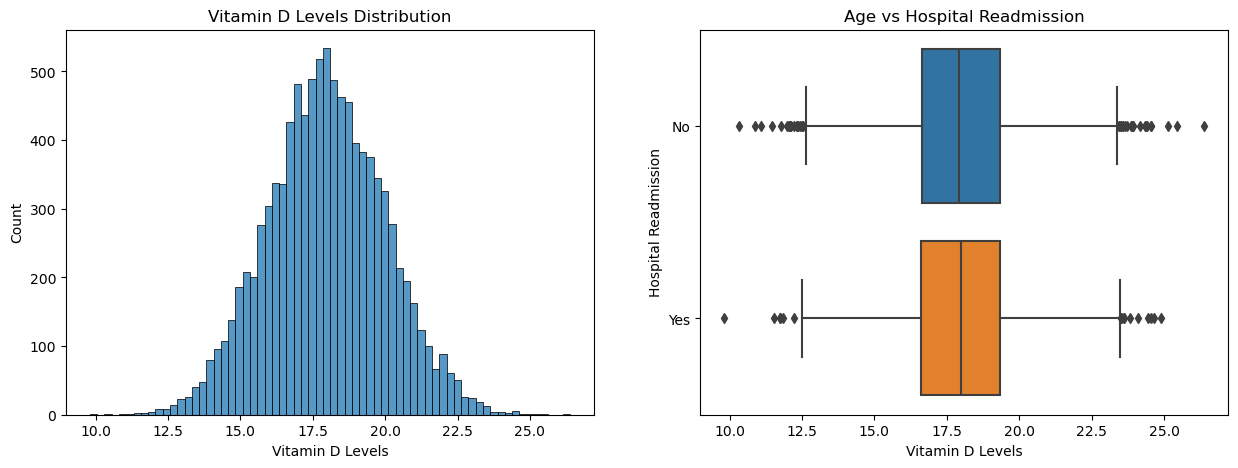

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#Univariate visualization
sns.histplot(data=df, x='vit_d_level', ax=ax[0])
ax[0].set_title('Vitamin D Levels Distribution')
ax[0].set_xlabel('Vitamin D Levels')

#Bivariate visualization
sns.boxplot(data=df, x='vit_d_level', y='readmission', ax=ax[1])
ax[1].set_title('Age vs Hospital Readmission')
ax[1].set_xlabel('Vitamin D Levels')
ax[1].set_ylabel('Hospital Readmission');

* `doc_visits`: There is a minimum doctor visit of 1 and a maximum visit of 9, with a range of 8 visits. The mean visits is 5.01 and the median number of visits is 5.

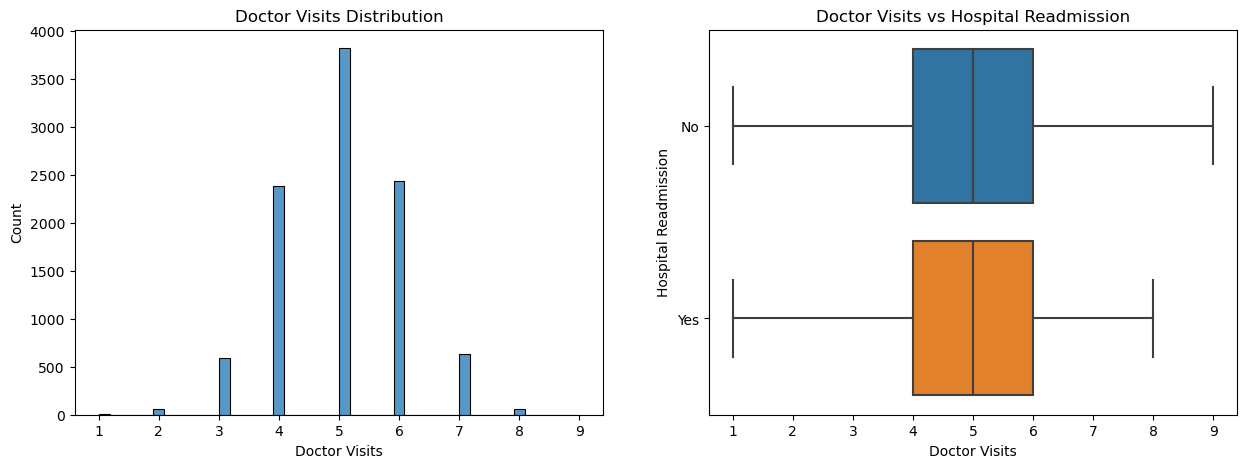

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#Univariate visualization
sns.histplot(data=df, x='doc_visits', ax=ax[0])
ax[0].set_title('Doctor Visits Distribution')
ax[0].set_xlabel('Doctor Visits')

#Bivariate visualization
sns.boxplot(data=df, x='doc_visits', y='readmission', ax=ax[1])
ax[1].set_title('Doctor Visits vs Hospital Readmission')
ax[1].set_xlabel('Doctor Visits')
ax[1].set_ylabel('Hospital Readmission');

* `initial_days`: The variable has a minimum of 1.00 day and a maximum of 71.98 days, with a range of 70.98 days. There is also a mean of 34.46 days and a median of 35.84 days.

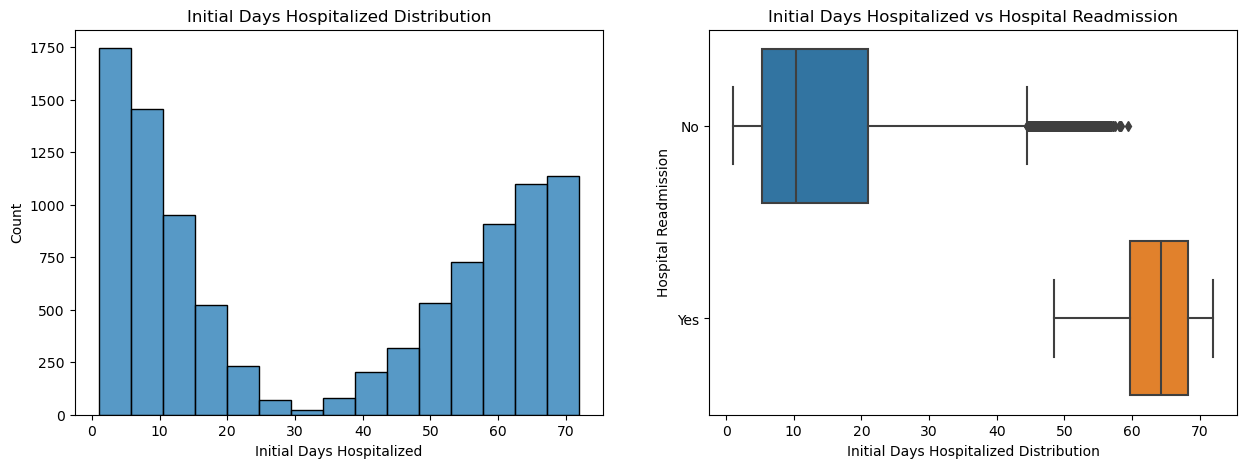

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

#Univariate visualization
sns.histplot(data=df, x='initial_days', ax=ax[0])
ax[0].set_title('Initial Days Hospitalized Distribution')
ax[0].set_xlabel('Initial Days Hospitalized')

#Bivariate visualization
sns.boxplot(data=df, x='initial_days', y='readmission', ax=ax[1])
ax[1].set_title('Initial Days Hospitalized vs Hospital Readmission')
ax[1].set_xlabel('Initial Days Hospitalized Distribution')
ax[1].set_ylabel('Hospital Readmission');

* `gender`

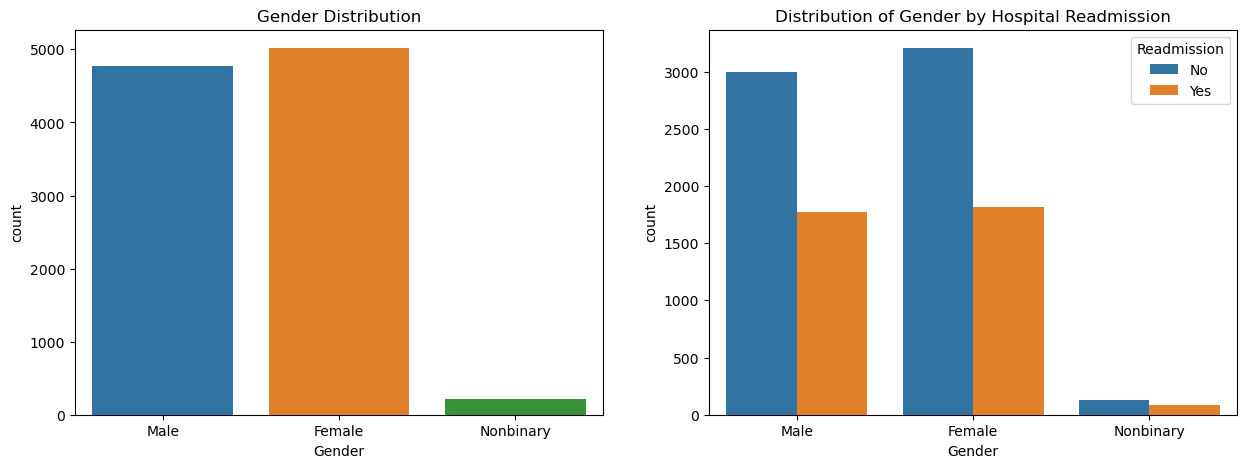

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='gender', ax=ax[0])
ax[0].set_title('Gender Distribution')
ax[0].set_xlabel('Gender')

#Bivariate visualization
sns.countplot(data=df, x='gender', hue='readmission', ax=ax[1])
ax[1].set_title('Distribution of Gender by Hospital Readmission')
ax[1].set_xlabel('Gender')
ax[1].legend(title='Readmission');

* `initial_admin`

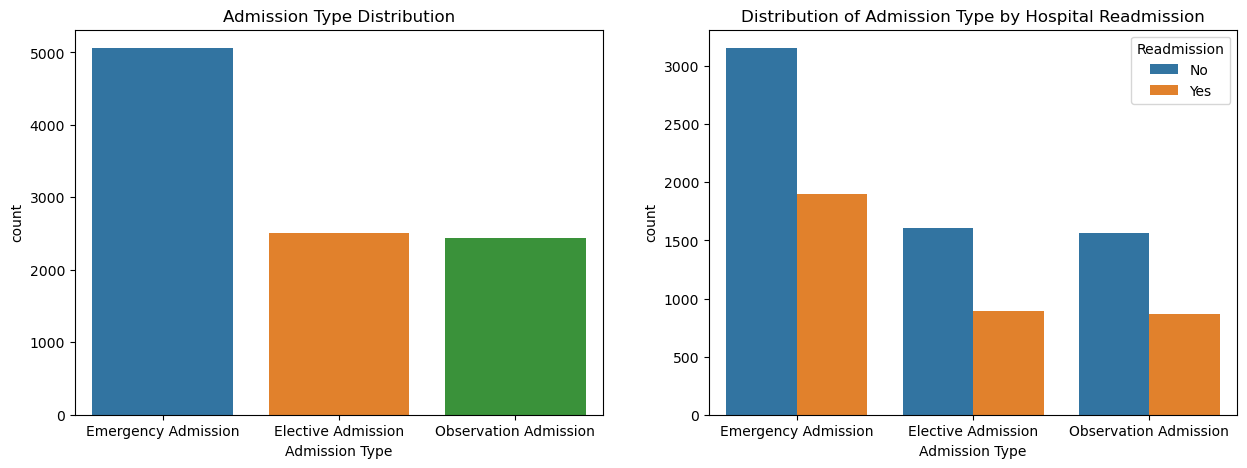

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='initial_admin', ax=ax[0])
ax[0].set_title('Admission Type Distribution')
ax[0].set_xlabel('Admission Type')

#Bivariate visualization
sns.countplot(data=df, x='initial_admin', hue='readmission', ax=ax[1])
ax[1].set_title('Distribution of Admission Type by Hospital Readmission')
ax[1].set_xlabel('Admission Type')
ax[1].legend(title='Readmission');

* `complication_risk`

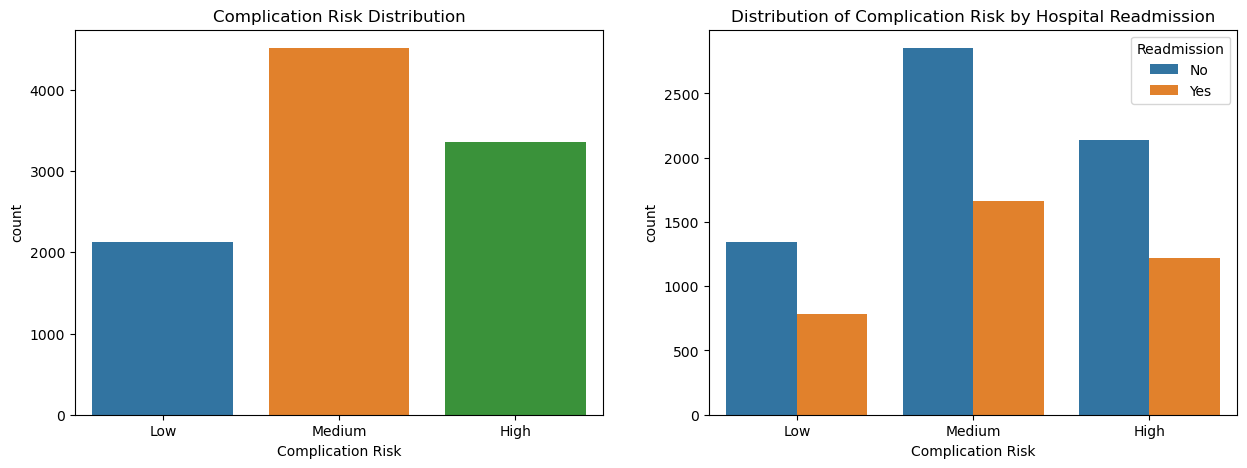

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='complication_risk', order=['Low', 'Medium', 'High'], ax=ax[0])
ax[0].set_title('Complication Risk Distribution')
ax[0].set_xlabel('Complication Risk')

#Bivariate visualization
sns.countplot(data=df, x='complication_risk', hue='readmission', order=['Low', 'Medium', 'High'], ax=ax[1])
ax[1].set_title('Distribution of Complication Risk by Hospital Readmission')
ax[1].set_xlabel('Complication Risk')
ax[1].legend(title='Readmission');

* `high_blood`

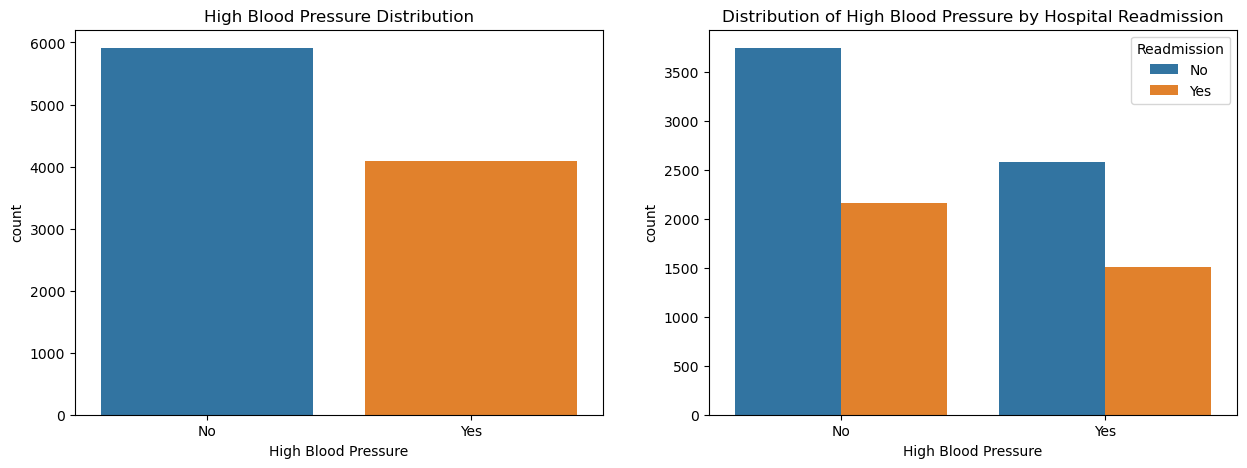

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='high_blood', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('High Blood Pressure Distribution')
ax[0].set_xlabel('High Blood Pressure')

#Bivariate visualization
sns.countplot(data=df, x='high_blood', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of High Blood Pressure by Hospital Readmission')
ax[1].set_xlabel('High Blood Pressure')
ax[1].legend(title='Readmission');

* `stroke`

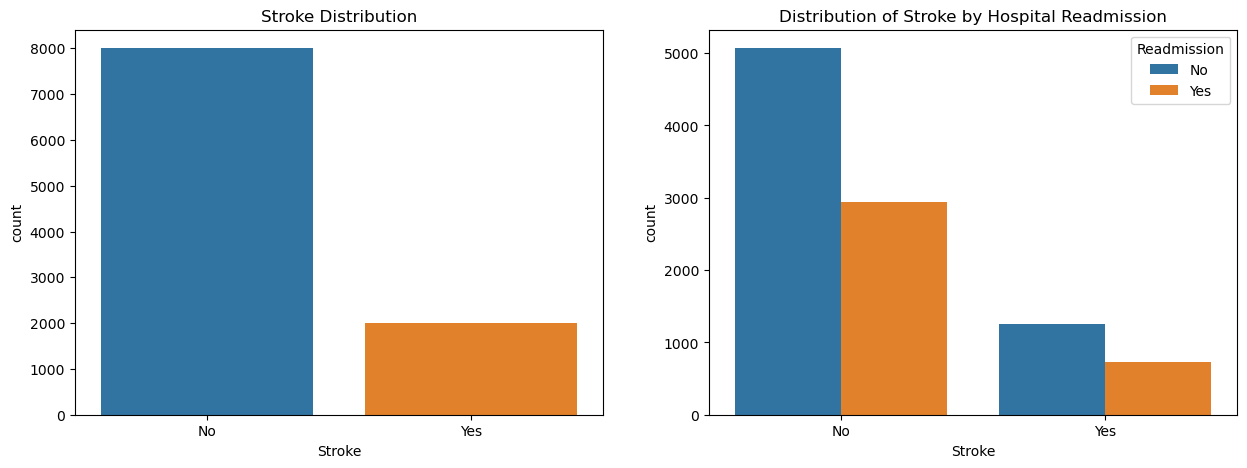

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='stroke', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Stroke Distribution')
ax[0].set_xlabel('Stroke')

#Bivariate visualization
sns.countplot(data=df, x='stroke', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Stroke by Hospital Readmission')
ax[1].set_xlabel('Stroke')
ax[1].legend(title='Readmission');

* `overweight`

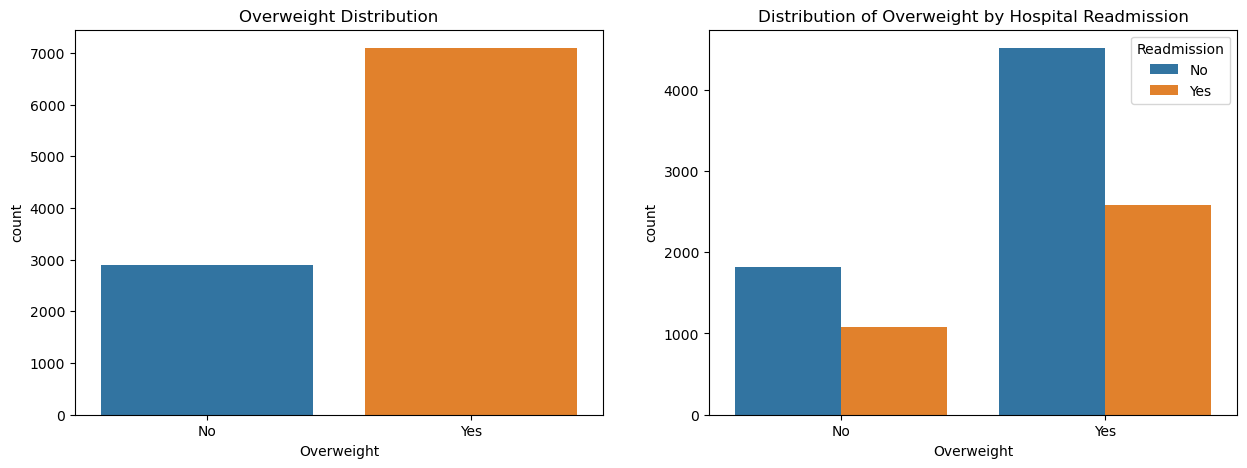

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='overweight', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Overweight Distribution')
ax[0].set_xlabel('Overweight')

#Bivariate visualization
sns.countplot(data=df, x='overweight', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Overweight by Hospital Readmission')
ax[1].set_xlabel('Overweight')
ax[1].legend(title='Readmission');

* `arthritis`

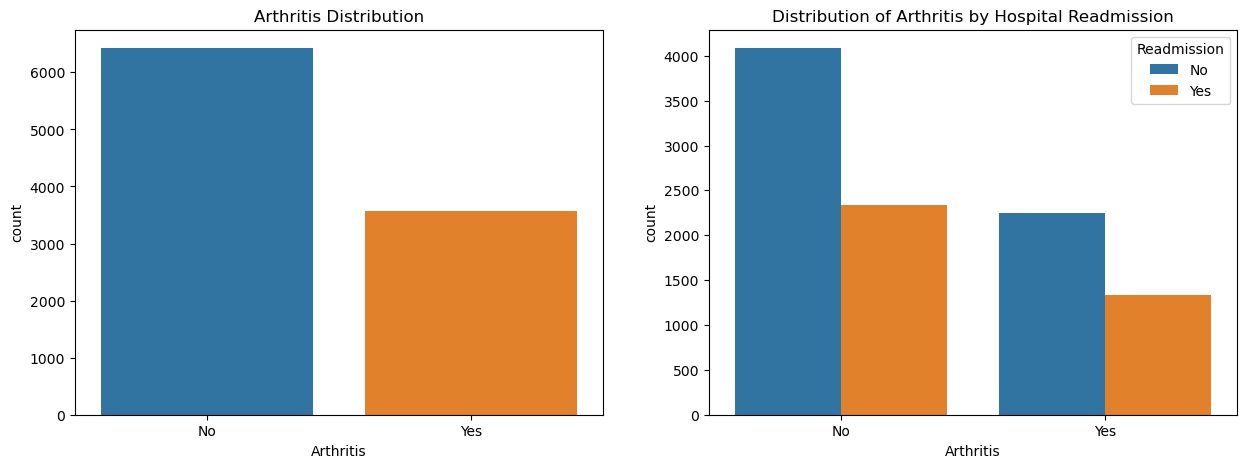

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='arthritis', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Arthritis Distribution')
ax[0].set_xlabel('Arthritis')

#Bivariate visualization
sns.countplot(data=df, x='arthritis', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Arthritis by Hospital Readmission')
ax[1].set_xlabel('Arthritis')
ax[1].legend(title='Readmission');

* `diabetes`

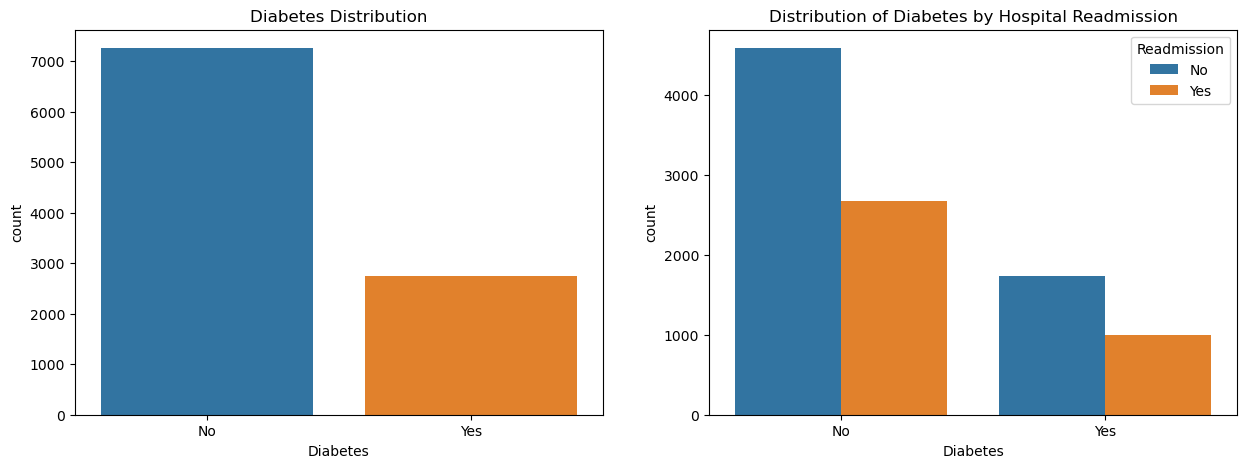

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='diabetes', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Diabetes Distribution')
ax[0].set_xlabel('Diabetes')

#Bivariate visualization
sns.countplot(data=df, x='diabetes', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Diabetes by Hospital Readmission')
ax[1].set_xlabel('Diabetes')
ax[1].legend(title='Readmission');

* `hyperlipidemia`

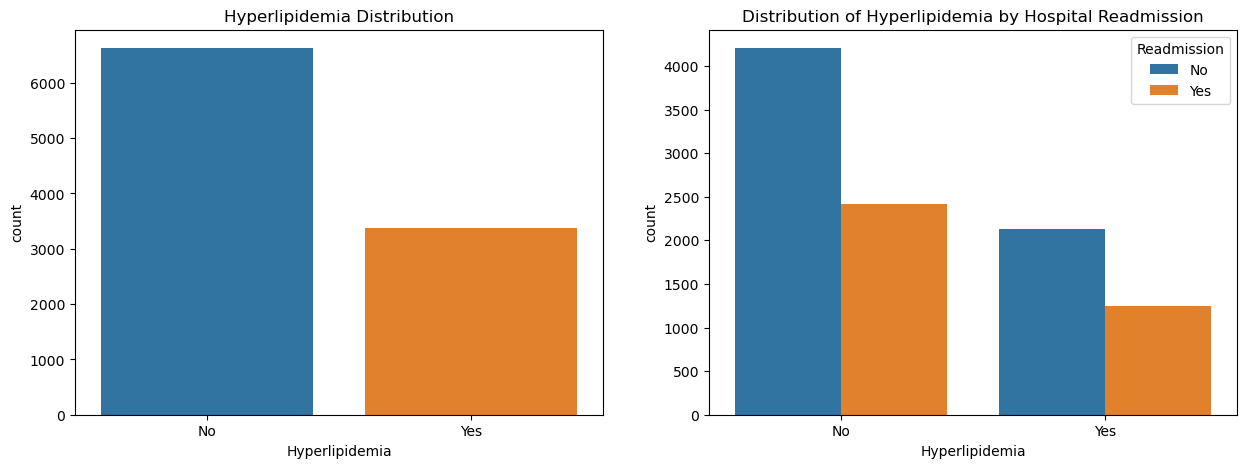

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='hyperlipidemia', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Hyperlipidemia Distribution')
ax[0].set_xlabel('Hyperlipidemia')

#Bivariate visualization
sns.countplot(data=df, x='hyperlipidemia', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Hyperlipidemia by Hospital Readmission')
ax[1].set_xlabel('Hyperlipidemia')
ax[1].legend(title='Readmission');

* `back_pain`

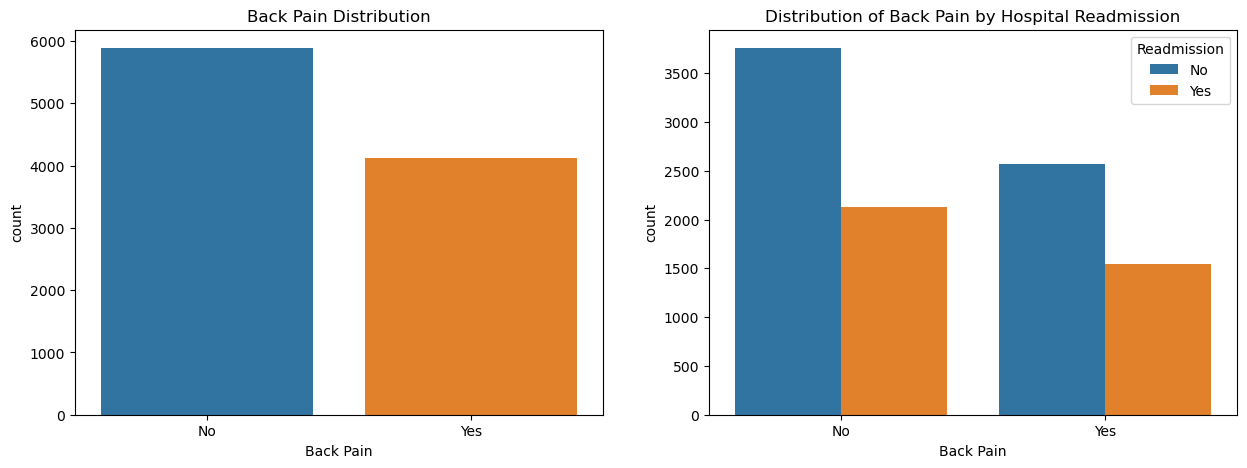

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='back_pain', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Back Pain Distribution')
ax[0].set_xlabel('Back Pain')

#Bivariate visualization
sns.countplot(data=df, x='back_pain', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Back Pain by Hospital Readmission')
ax[1].set_xlabel('Back Pain')
ax[1].legend(title='Readmission');

* `anxiety`

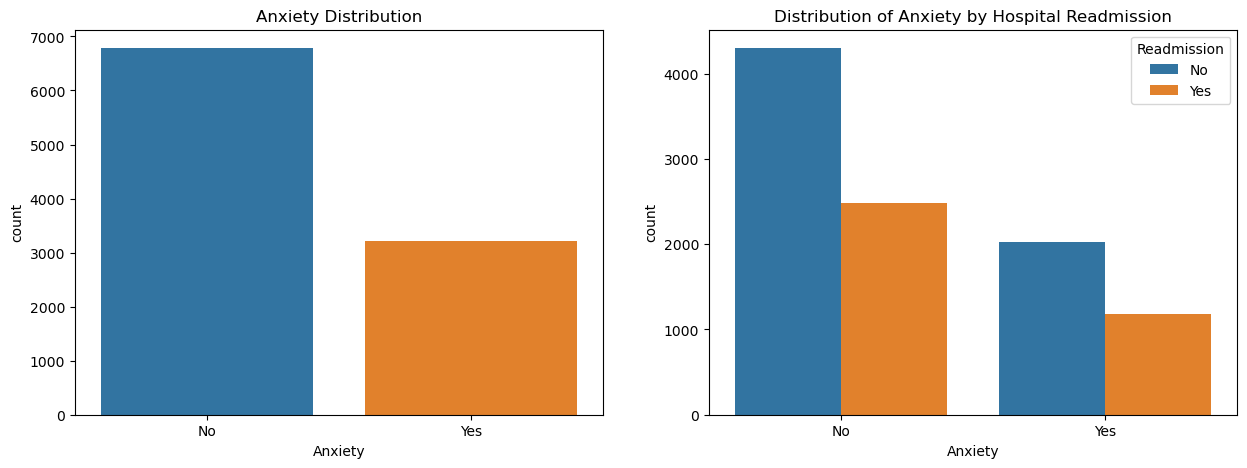

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='anxiety', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Anxiety Distribution')
ax[0].set_xlabel('Anxiety')

#Bivariate visualization
sns.countplot(data=df, x='anxiety', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Anxiety by Hospital Readmission')
ax[1].set_xlabel('Anxiety')
ax[1].legend(title='Readmission');

* `allergic_rhinitis`

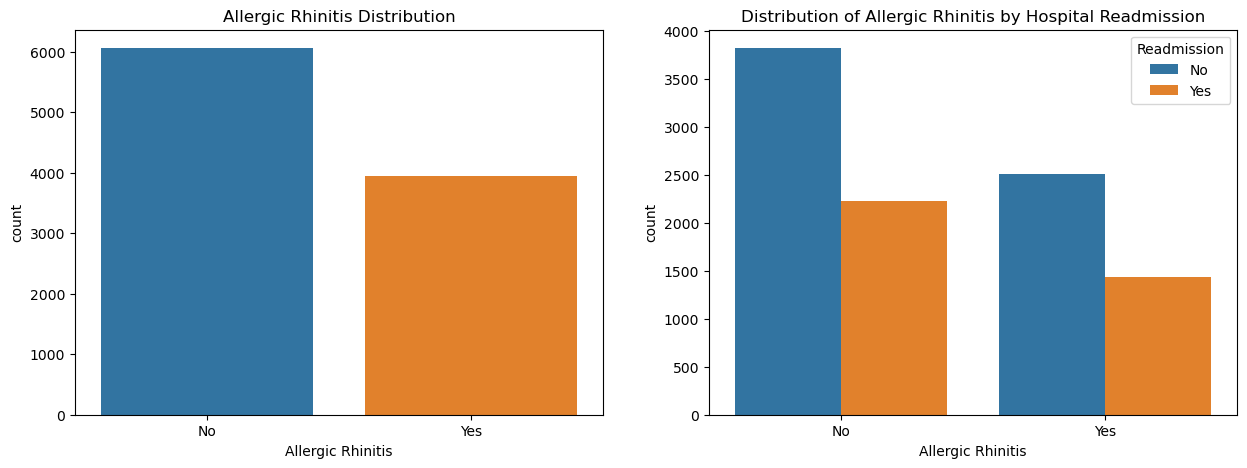

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='allergic_rhinitis', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Allergic Rhinitis Distribution')
ax[0].set_xlabel('Allergic Rhinitis')

#Bivariate visualization
sns.countplot(data=df, x='allergic_rhinitis', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Allergic Rhinitis by Hospital Readmission')
ax[1].set_xlabel('Allergic Rhinitis')
ax[1].legend(title='Readmission');

* `reflux_esophagitis`

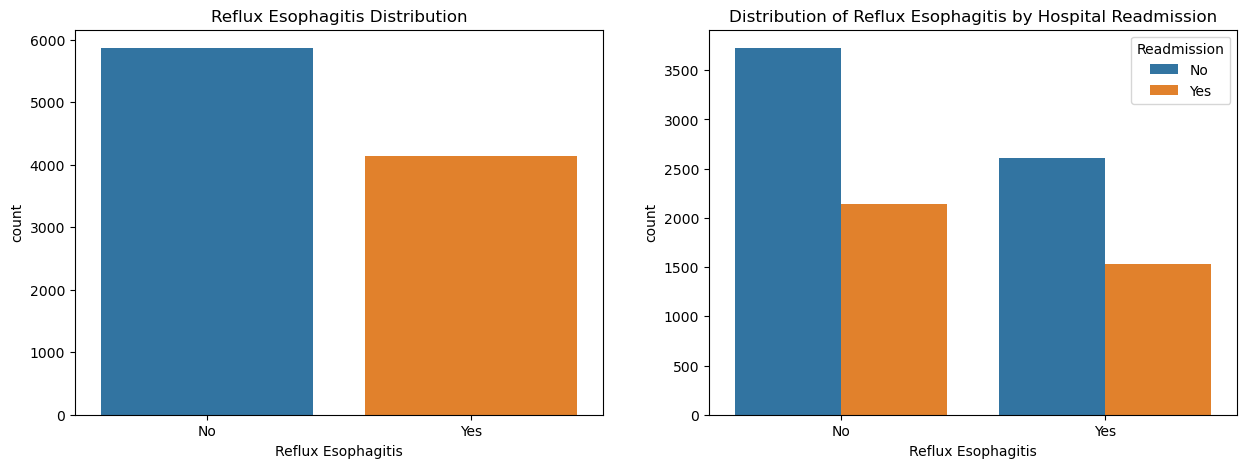

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='reflux_esophagitis', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Reflux Esophagitis Distribution')
ax[0].set_xlabel('Reflux Esophagitis')

#Bivariate visualization
sns.countplot(data=df, x='reflux_esophagitis', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Reflux Esophagitis by Hospital Readmission')
ax[1].set_xlabel('Reflux Esophagitis')
ax[1].legend(title='Readmission');

* `asthma`

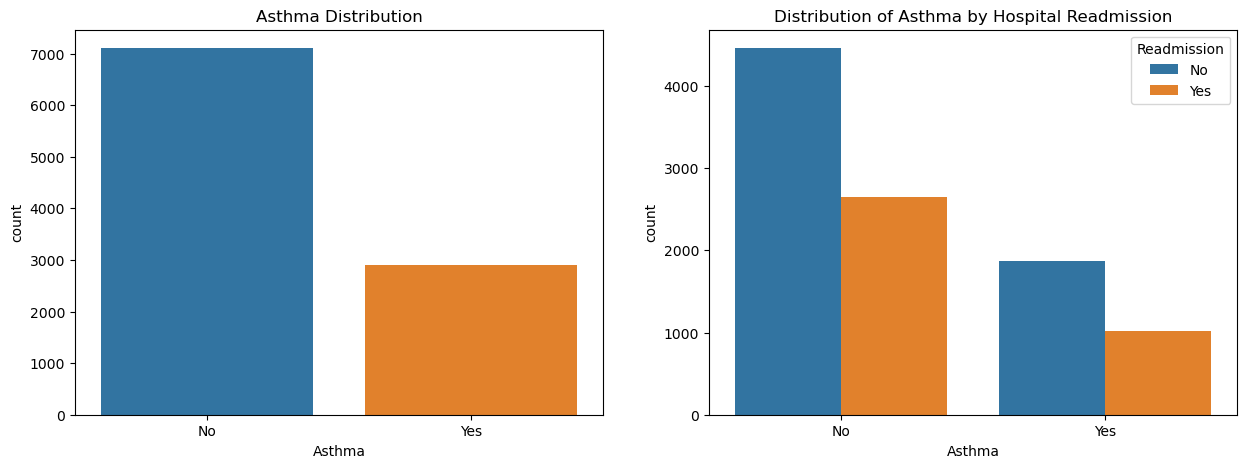

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

##Univariate visualization
sns.countplot(data=df, x='asthma', order=['No', 'Yes'], ax=ax[0])
ax[0].set_title('Asthma Distribution')
ax[0].set_xlabel('Asthma')

#Bivariate visualization
sns.countplot(data=df, x='asthma', hue='readmission', order=['No', 'Yes'], ax=ax[1])
ax[1].set_title('Distribution of Asthma by Hospital Readmission')
ax[1].set_xlabel('Asthma')
ax[1].legend(title='Readmission');

<BR>

## C4. Data Transformation <a class="anchor" id="C4"></a>

Before modeling, the data must be transformed into the proper format. The categorical variables will be dummy encoded in a k-1 fashion. Additionally, the values of the categorical variables will be re-casted into 1/0's for True/Yes and False/No, respectively, so that they can be inputted into the model without errors.

In [107]:
#Select categorical variables into new dataframes separated by presence of multilevel
df_cat = df[['high_blood', 'stroke', 'overweight', 'arthritis', 'diabetes', 'hyperlipidemia', 'back_pain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma', 'readmission']]
df_cat_multi = df[['gender', 'initial_admin', 'complication_risk']]
#Create dummy variables in k-1 fashion
df_cat_multi = pd.get_dummies(df_cat_multi, drop_first=True)
#Join all variables into final dataset and re-format columns
df_cat_all = pd.concat([df_cat_multi, df_cat], axis=1)
transformed_df = pd.concat([df[['age','vit_d_level', 'doc_visits', 'initial_days']], df_cat_all], axis=1).replace({True:1, 'Yes':1, False:0, 'No':0})
transformed_df.columns = transformed_df.columns.str.lower().str.replace(' ', '_')
transformed_df.head()

,age,vit_d_level,doc_visits,initial_days,gender_male,gender_nonbinary,initial_admin_emergency_admission,initial_admin_observation_admission,complication_risk_low,complication_risk_medium,high_blood,stroke,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,readmission
0,53,19.141466,6,10.585770,1,0,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0
1,51,18.940352,4,15.129562,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,53,18.057507,4,4.772177,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0
3,78,16.576858,4,1.714879,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0
4,22,17.439069,5,1.254807,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


<BR>

## C5. Prepared Data Set <a class="anchor" id="C5"></a>

A file containing the prepared data set that is used for the linear regression model will be submitted alongside the report and is called "Task2_data.csv."

In [111]:
#Create csv file containing prepared data set
transformed_df.to_csv('Task2_data.csv', index=False)

<BR>

## D1. Initial Model <a class="anchor" id="D1"></a>

In [114]:
#Select corresponding variables and fit initial logistic regression model
X = transformed_df.drop(columns='readmission')
X = sm.add_constant(X)
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035797
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9455
Time:                        10:45:22   Log-Likelihood:                -357.97
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -75.6019      4.170    -18.132      0.000     -83.774     -67.430
age                                     0.0015      0.005      0.316      0.752      -0.008       0.011
vit_d_level                             0.0333      0.046      0.721      0.471      -0.057       0.124
doc_visits                              0.0049      0.091      0.054      0.957      -0.173       0.183
initial_days                            1.3733      0.074     18.461      0.000       1.228       1.519
gender_male                             0.1611      0.197      0.816      0.414      -0.226       0.548
gender_nonbinary                        0.6535      0.693      0.943      0.346      -0.705       2.012
initial_admin_emergency_admission       2.2647      0.260      8.704      0.000       1.755       2.775
initial_admin_observation_admission     0.6596      0.267      2.468      0.014       0.136       1.183
complication_risk_low                  -1.6025      0.277     -5.794      0.000      -2.145      -1.060
complication_risk_medium               -0.3197      0.223     -1.436      0.151      -0.756       0.117
high_blood                              0.8721      0.206      4.234      0.000       0.468       1.276
stroke                                  1.5926      0.255      6.248      0.000       1.093       2.092
overweight                             -0.2550      0.217     -1.174      0.240      -0.681       0.171
arthritis                              -1.2940      0.217     -5.953      0.000      -1.720      -0.868
diabetes                                0.4732      0.219      2.158      0.031       0.044       0.903
hyperlipidemia                          0.2799      0.206      1.356      0.175      -0.125       0.684
back_pain                               0.3022      0.197      1.537      0.124      -0.083       0.688
anxiety                                -0.9909      0.216     -4.585      0.000      -1.414      -0.567
allergic_rhinitis                      -0.3264      0.199     -1.638      0.101      -0.717       0.064
reflux_esophagitis                     -0.3195      0.201     -1.593      0.111      -0.713       0.074
asthma                                 -1.2613      0.223     -5.654      0.000      -1.699      -0.824
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<BR>

## D2. Justification of Model Reduction <a class="anchor" id="D2"></a>

The initial model can be reduced further due to containing predictors that are not statistically significant. This phenomenon can be seen with predictor variables whose corresponding p-values are greater than an alpha level set at 0.05. Predictors fitting this criteria include age, Vitamin D levels, doctor visits, and more. These predictors contribute to the model by chance as they contain higher p-values; thus, there is a need to reduce the model to only statistically significant predictors.

The feature selection method to reduce the model will use backward stepwise elimination. This method is iterative, removing the least significant predictor, the one with the highest p-value, one at a time. After each elimination step, the model will be rerun on the remaining predictors to determine the next least significant predictor. This process is iterative because relationships in the model may change as others are removed, so p-values constantly change.

As mentioned, the lack of multicollinearity amongst predictors is also an assumption of logistic regression. This check was done by determining the variance inflation factor (VIF) score amongst predictors. A VIF score greater than 10 indicates high multicollinearity amongst predictors and suggests that such predictors should be removed to prevent further issues (The Investopedia Team, 2024). Predictors with the VIF scores greater than 10 were removed in an iterative fashion.

In [118]:
#Determing VIF scores (GeeksforGeeks, 2024).
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Remove constant column prior to running VIF
X = X.drop(columns='const')

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,7.361210
1,vit_d_level,29.750187
2,doc_visits,19.777536
3,initial_days,2.683379
4,gender_male,1.931936
5,gender_nonbinary,1.043843
6,initial_admin_emergency_admission,2.979870
7,initial_admin_observation_admission,1.950942
8,complication_risk_low,1.619504
9,complication_risk_medium,2.320791


In [119]:
#Remove vit_d_level (VIF = 29.75) column prior to running VIF
X = X.drop(columns='vit_d_level')

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,6.633500
1,doc_visits,12.071510
2,initial_days,2.622493
3,gender_male,1.903090
4,gender_nonbinary,1.042534
5,initial_admin_emergency_admission,2.853305
6,initial_admin_observation_admission,1.901369
7,complication_risk_low,1.594605
8,complication_risk_medium,2.262491
9,high_blood,1.677162


In [120]:
#Remove doc_visits (VIF = 12.07) column prior to running VIF
X = X.drop(columns='doc_visits')

#Calculate VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,5.476396
1,initial_days,2.534297
2,gender_male,1.856543
3,gender_nonbinary,1.041042
4,initial_admin_emergency_admission,2.647003
5,initial_admin_observation_admission,1.798402
6,complication_risk_low,1.561468
7,complication_risk_medium,2.191018
8,high_blood,1.654008
9,stroke,1.236306


In [121]:
#Check model before performing Backward Stepwise Elimination
X = sm.add_constant(X)
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035823
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9455
Time:                        10:45:22   Log-Likelihood:                -358.23
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -75.0101      4.059    -18.481      0.000     -82.965     -67.055
age                                     0.0015      0.005      0.331      0.740      -0.008       0.011
initial_days                            1.3739      0.074     18.459      0.000       1.228       1.520
gender_male                             0.1590      0.197      0.807      0.420      -0.227       0.545
gender_nonbinary                        0.6515      0.694      0.939      0.348      -0.708       2.011
initial_admin_emergency_admission       2.2669      0.260      8.724      0.000       1.758       2.776
initial_admin_observation_admission     0.6560      0.266      2.462      0.014       0.134       1.178
complication_risk_low                  -1.6092      0.276     -5.823      0.000      -2.151      -1.067
complication_risk_medium               -0.3177      0.222     -1.429      0.153      -0.753       0.118
high_blood                              0.8734      0.205      4.254      0.000       0.471       1.276
stroke                                  1.5893      0.255      6.243      0.000       1.090       2.088
overweight                             -0.2553      0.217     -1.176      0.239      -0.681       0.170
arthritis                              -1.2904      0.217     -5.954      0.000      -1.715      -0.866
diabetes                                0.4686      0.218      2.146      0.032       0.041       0.897
hyperlipidemia                          0.2813      0.206      1.366      0.172      -0.122       0.685
back_pain                               0.3026      0.196      1.541      0.123      -0.082       0.688
anxiety                                -0.9873      0.216     -4.578      0.000      -1.410      -0.565
allergic_rhinitis                      -0.3309      0.199     -1.666      0.096      -0.720       0.058
reflux_esophagitis                     -0.3232      0.201     -1.612      0.107      -0.716       0.070
asthma                                 -1.2617      0.223     -5.663      0.000      -1.698      -0.825
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [122]:
#Backward Stepwise Elimination #1: remove age (p-value = 0.740)
X = X.drop(columns='age')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035829
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9455
Time:                        10:45:23   Log-Likelihood:                -358.29
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.9826      4.060    -18.469      0.000     -82.940     -67.025
initial_days                            1.3750      0.074     18.474      0.000       1.229       1.521
gender_male                             0.1550      0.197      0.788      0.431      -0.231       0.541
gender_nonbinary                        0.6458      0.693      0.932      0.351      -0.712       2.004
initial_admin_emergency_admission       2.2646      0.260      8.721      0.000       1.756       2.774
initial_admin_observation_admission     0.6570      0.266      2.468      0.014       0.135       1.179
complication_risk_low                  -1.6091      0.276     -5.823      0.000      -2.151      -1.067
complication_risk_medium               -0.3218      0.222     -1.450      0.147      -0.757       0.113
high_blood                              0.8745      0.205      4.261      0.000       0.472       1.277
stroke                                  1.5900      0.255      6.243      0.000       1.091       2.089
overweight                             -0.2559      0.217     -1.180      0.238      -0.681       0.169
arthritis                              -1.2885      0.217     -5.948      0.000      -1.713      -0.864
diabetes                                0.4625      0.217      2.127      0.033       0.036       0.889
hyperlipidemia                          0.2805      0.206      1.362      0.173      -0.123       0.684
back_pain                               0.3024      0.196      1.540      0.123      -0.082       0.687
anxiety                                -0.9839      0.215     -4.568      0.000      -1.406      -0.562
allergic_rhinitis                      -0.3323      0.199     -1.674      0.094      -0.721       0.057
reflux_esophagitis                     -0.3302      0.199     -1.656      0.098      -0.721       0.061
asthma                                 -1.2632      0.223     -5.668      0.000      -1.700      -0.826
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [123]:
#Backward Stepwise Elimination #2: remove gender_male (p-value = 0.431)
X = X.drop(columns='gender_male')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035860
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9454
Time:                        10:45:23   Log-Likelihood:                -358.60
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.9643      4.062    -18.457      0.000     -82.925     -67.004
initial_days                            1.3764      0.074     18.477      0.000       1.230       1.522
gender_nonbinary                        0.5708      0.686      0.832      0.406      -0.774       1.916
initial_admin_emergency_admission       2.2551      0.259      8.706      0.000       1.747       2.763
initial_admin_observation_admission     0.6552      0.266      2.464      0.014       0.134       1.176
complication_risk_low                  -1.6225      0.276     -5.889      0.000      -2.163      -1.082
complication_risk_medium               -0.3331      0.221     -1.505      0.132      -0.767       0.101
high_blood                              0.8660      0.205      4.233      0.000       0.465       1.267
stroke                                  1.6073      0.254      6.330      0.000       1.110       2.105
overweight                             -0.2596      0.217     -1.197      0.231      -0.685       0.166
arthritis                              -1.2751      0.216     -5.915      0.000      -1.698      -0.853
diabetes                                0.4584      0.217      2.109      0.035       0.032       0.884
hyperlipidemia                          0.2821      0.206      1.370      0.171      -0.121       0.686
back_pain                               0.2977      0.196      1.518      0.129      -0.087       0.682
anxiety                                -0.9915      0.215     -4.608      0.000      -1.413      -0.570
allergic_rhinitis                      -0.3364      0.198     -1.696      0.090      -0.725       0.052
reflux_esophagitis                     -0.3343      0.199     -1.679      0.093      -0.725       0.056
asthma                                 -1.2549      0.222     -5.646      0.000      -1.691      -0.819
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [124]:
#Backward Stepwise Elimination #3: remove gender_nonbinary (p-value = 0.406)
X = X.drop(columns='gender_nonbinary')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035894
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9454
Time:                        10:45:23   Log-Likelihood:                -358.94
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.8751      4.051    -18.482      0.000     -82.816     -66.935
initial_days                            1.3749      0.074     18.501      0.000       1.229       1.521
initial_admin_emergency_admission       2.2363      0.257      8.685      0.000       1.732       2.741
initial_admin_observation_admission     0.6459      0.266      2.432      0.015       0.125       1.167
complication_risk_low                  -1.6263      0.276     -5.902      0.000      -2.166      -1.086
complication_risk_medium               -0.3262      0.221     -1.476      0.140      -0.759       0.107
high_blood                              0.8655      0.205      4.231      0.000       0.465       1.266
stroke                                  1.5996      0.253      6.317      0.000       1.103       2.096
overweight                             -0.2509      0.216     -1.159      0.246      -0.675       0.173
arthritis                              -1.2697      0.215     -5.894      0.000      -1.692      -0.848
diabetes                                0.4636      0.217      2.133      0.033       0.038       0.890
hyperlipidemia                          0.2760      0.206      1.343      0.179      -0.127       0.679
back_pain                               0.3098      0.196      1.584      0.113      -0.074       0.693
anxiety                                -0.9901      0.215     -4.604      0.000      -1.412      -0.569
allergic_rhinitis                      -0.3299      0.198     -1.666      0.096      -0.718       0.058
reflux_esophagitis                     -0.3434      0.199     -1.729      0.084      -0.733       0.046
asthma                                 -1.2550      0.222     -5.651      0.000      -1.690      -0.820
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [125]:
#Backward Stepwise Elimination #4: remove overweight (p-value = 0.246)
X = X.drop(columns='overweight')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.035962
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9453
Time:                        10:45:23   Log-Likelihood:                -359.62
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.7690      4.039    -18.511      0.000     -82.686     -66.852
initial_days                            1.3697      0.074     18.541      0.000       1.225       1.515
initial_admin_emergency_admission       2.2191      0.257      8.644      0.000       1.716       2.722
initial_admin_observation_admission     0.6282      0.265      2.368      0.018       0.108       1.148
complication_risk_low                  -1.6193      0.275     -5.884      0.000      -2.159      -1.080
complication_risk_medium               -0.3140      0.221     -1.422      0.155      -0.747       0.119
high_blood                              0.8471      0.204      4.162      0.000       0.448       1.246
stroke                                  1.5982      0.253      6.316      0.000       1.102       2.094
arthritis                              -1.2819      0.215     -5.960      0.000      -1.703      -0.860
diabetes                                0.4697      0.217      2.165      0.030       0.044       0.895
hyperlipidemia                          0.2739      0.205      1.334      0.182      -0.128       0.676
back_pain                               0.3168      0.195      1.622      0.105      -0.066       0.700
anxiety                                -0.9897      0.215     -4.605      0.000      -1.411      -0.568
allergic_rhinitis                      -0.3184      0.198     -1.611      0.107      -0.706       0.069
reflux_esophagitis                     -0.3309      0.198     -1.671      0.095      -0.719       0.057
asthma                                 -1.2534      0.222     -5.652      0.000      -1.688      -0.819
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [126]:
#Backward Stepwise Elimination #5: remove hyperlipidemia (p-value = 0.182)
X = X.drop(columns='hyperlipidemia')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036051
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9452
Time:                        10:45:23   Log-Likelihood:                -360.51
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.5183      4.024    -18.517      0.000     -82.406     -66.631
initial_days                            1.3671      0.074     18.547      0.000       1.223       1.512
initial_admin_emergency_admission       2.2316      0.256      8.704      0.000       1.729       2.734
initial_admin_observation_admission     0.6409      0.264      2.424      0.015       0.123       1.159
complication_risk_low                  -1.6376      0.275     -5.963      0.000      -2.176      -1.099
complication_risk_medium               -0.3276      0.220     -1.486      0.137      -0.760       0.104
high_blood                              0.8486      0.203      4.174      0.000       0.450       1.247
stroke                                  1.5788      0.252      6.272      0.000       1.085       2.072
arthritis                              -1.2717      0.215     -5.927      0.000      -1.692      -0.851
diabetes                                0.4609      0.217      2.127      0.033       0.036       0.886
back_pain                               0.3150      0.195      1.615      0.106      -0.067       0.697
anxiety                                -0.9971      0.215     -4.643      0.000      -1.418      -0.576
allergic_rhinitis                      -0.3321      0.197     -1.686      0.092      -0.718       0.054
reflux_esophagitis                     -0.3371      0.198     -1.704      0.088      -0.725       0.051
asthma                                 -1.2571      0.222     -5.663      0.000      -1.692      -0.822
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [127]:
#Backward Stepwise Elimination #6: remove complication_risk_medium (p-value = 0.137)
X = X.drop(columns='complication_risk_medium')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036162
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9450
Time:                        10:45:23   Log-Likelihood:                -361.62
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.5594      4.024    -18.530      0.000     -82.446     -66.673
initial_days                            1.3646      0.074     18.539      0.000       1.220       1.509
initial_admin_emergency_admission       2.2287      0.256      8.719      0.000       1.728       2.730
initial_admin_observation_admission     0.6270      0.264      2.377      0.017       0.110       1.144
complication_risk_low                  -1.4489      0.241     -6.002      0.000      -1.922      -0.976
high_blood                              0.8435      0.203      4.160      0.000       0.446       1.241
stroke                                  1.5678      0.251      6.258      0.000       1.077       2.059
arthritis                              -1.2663      0.214     -5.914      0.000      -1.686      -0.847
diabetes                                0.4642      0.216      2.147      0.032       0.040       0.888
back_pain                               0.3080      0.195      1.583      0.113      -0.073       0.689
anxiety                                -1.0159      0.214     -4.741      0.000      -1.436      -0.596
allergic_rhinitis                      -0.3273      0.197     -1.664      0.096      -0.713       0.058
reflux_esophagitis                     -0.3373      0.197     -1.712      0.087      -0.723       0.049
asthma                                 -1.2577      0.222     -5.677      0.000      -1.692      -0.823
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.81 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [128]:
#Backward Stepwise Elimination #7: remove back_pain (p-value = 0.113)
X = X.drop(columns='back_pain')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036288
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9448
Time:                        10:45:23   Log-Likelihood:                -362.88
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -74.1899      3.995    -18.568      0.000     -82.021     -66.359
initial_days                            1.3598      0.073     18.578      0.000       1.216       1.503
initial_admin_emergency_admission       2.2301      0.255      8.757      0.000       1.731       2.729
initial_admin_observation_admission     0.6373      0.263      2.425      0.015       0.122       1.152
complication_risk_low                  -1.4507      0.241     -6.022      0.000      -1.923      -0.979
high_blood                              0.8449      0.202      4.175      0.000       0.448       1.242
stroke                                  1.5537      0.250      6.216      0.000       1.064       2.044
arthritis                              -1.2702      0.214     -5.940      0.000      -1.689      -0.851
diabetes                                0.4676      0.217      2.156      0.031       0.043       0.893
anxiety                                -0.9753      0.211     -4.615      0.000      -1.390      -0.561
allergic_rhinitis                      -0.3138      0.196     -1.602      0.109      -0.698       0.070
reflux_esophagitis                     -0.3306      0.197     -1.681      0.093      -0.716       0.055
asthma                                 -1.2545      0.221     -5.679      0.000      -1.688      -0.822
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [129]:
#Backward Stepwise Elimination #8: remove allergic_rhinitis (p-value = 0.109)
X = X.drop(columns='allergic_rhinitis')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036417
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9446
Time:                        10:45:23   Log-Likelihood:                -364.17
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -73.9347      3.959    -18.676      0.000     -81.694     -66.175
initial_days                            1.3529      0.072     18.686      0.000       1.211       1.495
initial_admin_emergency_admission       2.2106      0.254      8.718      0.000       1.714       2.708
initial_admin_observation_admission     0.6302      0.262      2.401      0.016       0.116       1.145
complication_risk_low                  -1.4559      0.241     -6.051      0.000      -1.927      -0.984
high_blood                              0.8380      0.202      4.151      0.000       0.442       1.234
stroke                                  1.5495      0.250      6.195      0.000       1.059       2.040
arthritis                              -1.2634      0.213     -5.923      0.000      -1.681      -0.845
diabetes                                0.4618      0.216      2.134      0.033       0.038       0.886
anxiety                                -0.9587      0.210     -4.561      0.000      -1.371      -0.547
reflux_esophagitis                     -0.3138      0.196     -1.602      0.109      -0.698       0.070
asthma                                 -1.2468      0.220     -5.669      0.000      -1.678      -0.816
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [130]:
#Backward Stepwise Elimination #9: remove reflux_esophagitis (p-value = 0.109)
X = X.drop(columns='reflux_esophagitis')
y = transformed_df.readmission
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036546
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9444
Time:                        10:45:23   Log-Likelihood:                -365.46
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -73.7816      3.942    -18.718      0.000     -81.507     -66.056
initial_days                            1.3478      0.072     18.725      0.000       1.207       1.489
initial_admin_emergency_admission       2.1892      0.253      8.670      0.000       1.694       2.684
initial_admin_observation_admission     0.6244      0.262      2.380      0.017       0.110       1.138
complication_risk_low                  -1.4550      0.240     -6.054      0.000      -1.926      -0.984
high_blood                              0.8364      0.201      4.152      0.000       0.442       1.231
stroke                                  1.5428      0.249      6.190      0.000       1.054       2.031
arthritis                              -1.2588      0.213     -5.906      0.000      -1.677      -0.841
diabetes                                0.4822      0.216      2.231      0.026       0.059       0.906
anxiety                                -0.9458      0.209     -4.515      0.000      -1.356      -0.535
asthma                                 -1.2353      0.219     -5.644      0.000      -1.664      -0.806
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<BR>

## D3. Reduced Logistic Regression Model <a class="anchor" id="D3"></a>

In [133]:
#Reduced Logistic Regression Model
model = sm.Logit(y, X)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.036546
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            readmission   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.9444
Time:                        10:45:23   Log-Likelihood:                -365.46
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -73.7816      3.942    -18.718      0.000     -81.507     -66.056
initial_days                            1.3478      0.072     18.725      0.000       1.207       1.489
initial_admin_emergency_admission       2.1892      0.253      8.670      0.000       1.694       2.684
initial_admin_observation_admission     0.6244      0.262      2.380      0.017       0.110       1.138
complication_risk_low                  -1.4550      0.240     -6.054      0.000      -1.926      -0.984
high_blood                              0.8364      0.201      4.152      0.000       0.442       1.231
stroke                                  1.5428      0.249      6.190      0.000       1.054       2.031
arthritis                              -1.2588      0.213     -5.906      0.000      -1.677      -0.841
diabetes                                0.4822      0.216      2.231      0.026       0.059       0.906
anxiety                                -0.9458      0.209     -4.515      0.000      -1.356      -0.535
asthma                                 -1.2353      0.219     -5.644      0.000      -1.664      -0.806
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<BR>

## E1. Model Comparison <a class="anchor" id="E1"></a>

The initial model originally contained 21 predictors, including those that were dummy-encoded. In contrast, the final, reduced model contains only 10 predictors. Two metrics that can be used to compare the models are the pseudo R-squared and LLR p-value. Pseudo R-squared values can be used to compare models that predict the same outcomes, in which higher values indicate which model would better predict said outcomes, thus indicating which is the better model (UCLA, n.d.). From the results of this analysis, both pseudo-R-squared values are very similar at 0.9455 vs. 0.9444 for the initial and reduced models, respectively. This indicates that both models perform about the same. The LLR p-value can be used to determine a model's statistical significance using a certain threshold, such as a significance level of 0.05. Both models contain LLR p-values of 0.000, indicating that both models are statistically significant and that predictions from these models would not be likely due to chance. Although these metrics are very similar, the reduced model is better than the initial model due to the smaller number of predictors. With fewer predictors, the model is less complex, thus generalizing better. Additionally, because fewer predictors exist, the model performance would be faster than the initial model.

<BR>

## E2. Output and Calculations <a class="anchor" id="E2"></a>

Using Scikit-learn, an accuracy score was calculated for the final model. This result produced an accuracy of 98.47%. Although very high, it should be noted that this score represents training accuracy as the model was trained and then tested via accuracy score on the same data set. This score indicates that the model works well for this data set but not necessarily with out-of-sample data.

Also calculated was a confusion matrix between the predictions and the actual results. It can be seen that there are 6253 true negatives, 3594 true positives, 75 false negatives, and 78 false positives.

In [140]:
y_pred = round(result.predict(X)) #Calculate predicted values using final model
acc = accuracy_score(y, y_pred) #Calculate accuracy of final model
cm = confusion_matrix(y, y_pred) #Create Confusion Matrix

print("Accuracy:", acc)
print(cm)

Accuracy: 0.9847
[[6253   78]
 [  75 3594]]


<BR>

## E3. Code <a class="anchor" id="E3"></a>

Attached is a file containing all code used, named as "D208_Task_2_Leng_Yang.ipynb."

<BR>

## F1. Results <a class="anchor" id="F1"></a>

The final reduced logistic regression equation is:

$\text{logit(p)}=-73.78+1.35(\text{days hospitalized})+2.19(\text{emergency admission})+0.62(\text{observation admission})-1.45(\text{low complication risk})+0.84(\text{high blood pressure})+1.54(\text{stroke})-1.26(\text{arthritis})+0.48(\text{diabetes})-0.95(\text{anxiety})-1.24(\text{asthma})$

The intercept and coefficients can be interpreted like so:
* The intercept represents the log odds of hospital readmission when all predictors are zero or absent.
* Holding all other variables constant, a one-unit increase in days hospitalized causes the log odds of hospital readmission to increase by 1.35.
* Holding all other variables constant, having an emergency admission causes the log odds of hospital readmission to increase by 2.19 compared to elective admissions.
* Holding all other variables constant, having an observation admission causes the log odds of hospital readmission to increase by 0.62 compared to elective admissions.
* Holding all other variables constant, having a low complication risk causes the log odds of hospital readmission to decrease by 1.45 compared to other complication risk levels.
* Holding all other variables constant, patients with high blood pressure cause the log odds of hospital readmission to increase by 0.84.
* Holding all other variables constant, patients with stroke cause the log odds of hospital readmission to increase by 1.54.
* Holding all other variables constant, patients with arthritis cause the log odds of hospital readmission to decrease by 1.26.
* Holding all other variables constant, patients with diabetes cause the log odds of hospital readmission to increase by 0.48.
* Holding all other variables constant, patients with anxiety cause the log odds of hospital readmission to decrease by 0.95.
* Holding all other variables constant, patients with asthma cause the log odds of hospital readmission to decrease by 1.24.

**Statistical and Practical Significance**  
The model is statistically significant with an LLR p-value of 0.00 when looking at a significance level of 0.05. Additionally, all predictors are statistically significant, with all p-values being less than 0.05. On the other hand, the model does not hold much practical significance without further tuning it. As stated previously, the model was trained and tested on the entirety of the data, so calculating an accuracy score represents the training accuracy. As the model made predictions on the data for which it used to train itself, this wouldn't automatically translate well to making predictions on data it has yet to see, also known as out-of-sample data. Having out-of-sample data to test on could give insight into the testing accuracy and, therefore, help validate and determine the model's practicality, but that was not done in this analysis.

**Limitations**  
One of the more prevalent limitations revolves around data quality. Given that this is medical data, it is essential to verify the source to ensure that such data is correct and error-free. However, verifying the data source can't be done given this project's scope. Another limitation is a lack of domain knowledge. Domain knowledge is essential here because many other factors, significantly more than what this model has conveyed, can lead to hospital readmissions. Additionally, as outliers impact logistic regression, and none were removed in this analysis, this may have shifted some of the calculated estimates.

<BR>

## F2. Recommendations <a class="anchor" id="F2"></a>

Further analysis should be conducted to generalize this model better and bring it into a realm of practicality. Such analysis could include splitting the data into different sets, where one is used to train the model and another to test it. This test data would be data that the model is not trained on and would represent out-of-sample data that could be used to evaluate model accuracy better. Additionally, instead of selecting features based purely on statistical thinking, features could be specified on another model evaluation metric, such as selecting features that produce a model with the highest accuracy. Furthermore, with model evaluation metrics in mind, such as accuracy, other classification models could be used and compared to select the model with the best metric score.

<BR>

## G. Panopto Demonstration <a class="anchor" id="G"></a>

A Panopto video is included alongside the assessment submission and can also be found at: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=1bb4b72e-0ad2-4e04-800b-b1ce01037c6c

<BR>

## H. Sources of Third-Party Code <a class="anchor" id="H"></a>

GeeksforGeeks. (2024, August 5). _Detecting multicollinearity with VIF - python_. https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/ 

Yang, L. (2024). _D206 PA Leng Yang Code_. [Unpublished assignment submitted for D206]. Western Governors Univeristy.

<BR>

## I. Sources <a class="anchor" id="I"></a>

Bobbitt, Z. (2020, October 13). _The 6 Assumptions of Logistic Regression (With Examples)_. Statology. https://statology.org/assumptions-of-logistic-regression/ 

The Investopedia Team. (2024, June 27). _Variance inflation factor (VIF)_. Investopedia. https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results. 

UCLA. (n.d.). _FAQ: What are pseudo R-squareds?_. OARC Stats. https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-what-are-pseudo-r-squareds/ 